# Predicción con Series de Tiempo

En este laboratorio se implementan 5 métodos diferentes para predecir con series de tiempo, utilizando 4 data sets distintos.

In [1]:
# se cargan las librerias necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
%matplotlib inline

In [16]:
# se cargan los data sets
df_1 = pd.read_csv("shampoo.csv")

In [17]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Month   36 non-null     object 
 1   Sales   36 non-null     float64
dtypes: float64(1), object(1)
memory usage: 704.0+ bytes


In [15]:
df_1.index = pd.to_datetime(df_1['Month'])
df_1.drop(columns='Month',inplace=True)
df_1.head()

OutOfBoundsDatetime: Out of bounds nanosecond timestamp: 1-01-01 00:00:00

In [ ]:
df_1.tail()

#### Train and split

In [4]:
#train_test_split
buf = df_1.copy()
#train_test_split
tra = buf['Sales'][:17].dropna()
tes = buf['Sales'][18:].dropna()

<ipython-input-5-6aed5c2c48a8>:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  res = sm.tsa.seasonal_decompose(buf.Sales.dropna(),freq=17)


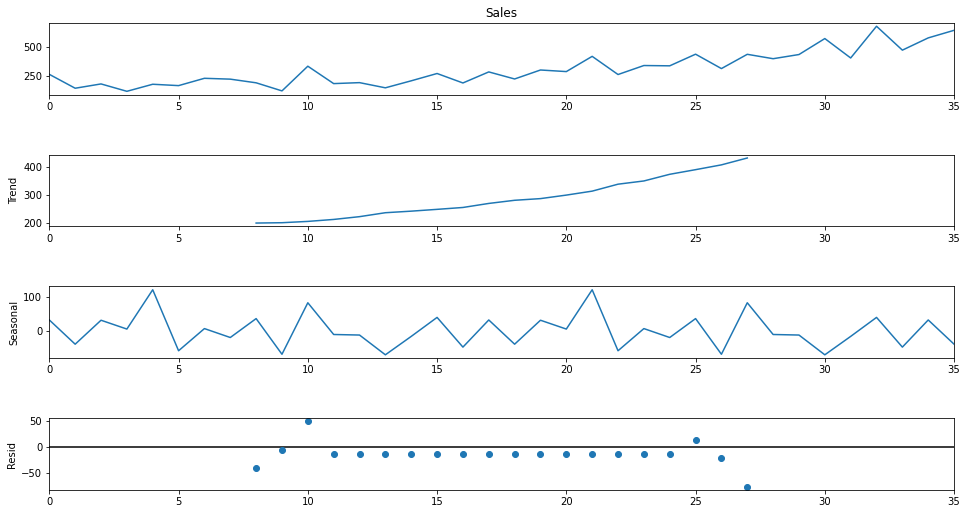

In [5]:
res = sm.tsa.seasonal_decompose(buf.Sales.dropna(),freq=17)
fig = res.plot()
fig.set_figheight(8)
fig.set_figwidth(15)
plt.show()

#### 1. Promedio

In [ ]:
def prediccion_promedio(historia, config):
    n, tipo_prom = config
    if tipo_prom == "prom":
        return mean(historia[-n:])
    return median(historia[-n:])

#### 2. SARIMAX

- Fuente de consulta: https://analyticsindiamag.com/complete-guide-to-sarimax-in-python-for-time-series-modeling/ \
https://www.kaggle.com/poiupoiu/how-to-use-sarimax

In [6]:
sarimax = sm.tsa.statespace.SARIMAX(tra,order=(1,1,1),seasonal_order=(1,1,1,12),exog = tra,
                                enforce_stationarity=False, enforce_invertibility=False).fit()
sarimax.summary()

c:\users\camila\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\camila\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tools\eval_measures.py:406: RuntimeWarning: invalid value encountered in log
  return -2.0 * llf + np.log(nobs) * df_modelwc
c:\users\camila\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tools\eval_measures.py:431: RuntimeWarning: invalid value encountered in log
  return -2.0 * llf + 2 * np.log(np.log(nobs)) * df_modelwc
c:\users\camila\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:2937: RuntimeWarning: divide by zero encountered in true_divide
  return self.params / self.bse
c:\users\camila\appdata\local\progra

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Sales   No. Observations:                   17
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                   0.000
Date:                            Wed, 22 Sep 2021   AIC                             12.000
Time:                                    23:13:45   BIC                                nan
Sample:                                         0   HQIC                               nan
                                             - 17                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Sales          1.0000         -0       -inf      0.000       1.000       1.000
ar.L1         -2.0000         -0        inf      0.000      -2.000      -2.000
ma.L1      -1.776e-15         -0        inf      0.000   -1.78e-15   -1.78e-15
ar.S.L12            0         -0        nan        nan           0           0
ma.S.L12            0         -0        nan        nan           0           0
sigma2          1e-10         -0       -inf      0.000       1e-10       1e-10
===================================================================================
Ljung-Box (L1) (Q):                    nan   Jarque-Bera (JB):                  nan
Prob(Q):                               nan   Prob(JB):                          nan
Heteroskedasticity (H):                nan   Skew:                              nan
Prob(H) (two-sided):                   nan   Kurtosis:                          nan
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number    inf. Standard errors may be unstable.
"""

c:\users\camila\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\camila\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tools\eval_measures.py:406: RuntimeWarning: invalid value encountered in log
  return -2.0 * llf + np.log(nobs) * df_modelwc
c:\users\camila\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tools\eval_measures.py:431: RuntimeWarning: invalid value encountered in log
  return -2.0 * llf + 2 * np.log(np.log(nobs)) * df_modelwc
c:\users\camila\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:2937: RuntimeWarning: divide by zero encountered in true_divide
  return self.params / self.bse
c:\users\camila\appdata\local\progra

ValueError: Can only compute partial correlations for lags up to 50% of the sample size. The requested nlags 15 must be < 8.

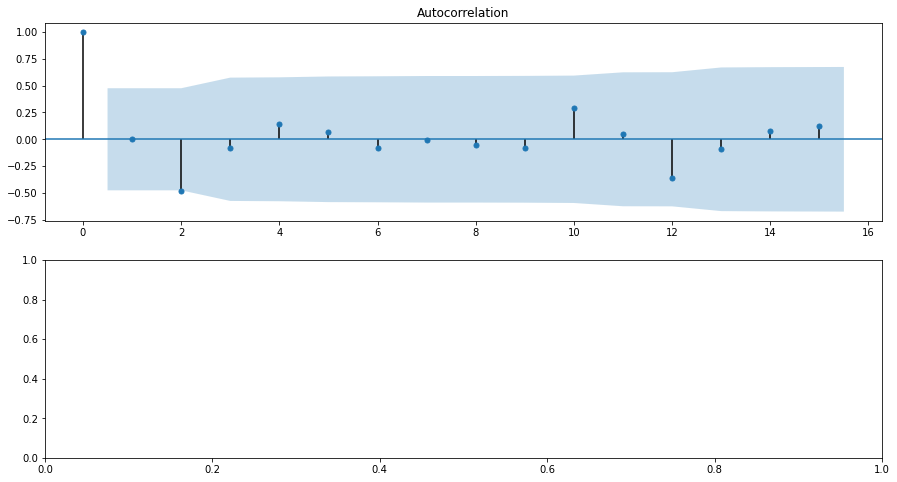

In [8]:
sarima = sm.tsa.statespace.SARIMAX(tra,order=(1,1,1),seasonal_order=(1,1,1,12),enforce_stationarity=False, enforce_invertibility=False).fit()
sarima.summary()
res = sarima.resid
fig,ax = plt.subplots(2,1,figsize=(15,8))
fig = sm.graphics.tsa.plot_acf(res, lags=15, ax=ax[0])
fig = sm.graphics.tsa.plot_pacf(res, lags=15, ax=ax[1])
plt.show()

In [ ]:
# Esto funcionaba? no me funciono 
# No, no funcionaba
# from sklearn.metrics import mean_squared_error
# pred = sarimax.predict('1959-06-31','1959-12-31',exog = tes)[1:]
# print('SARIMAX model MSE:{}'.format(mean_squared_error(tes, pred)))

In [ ]:
# pd.DataFrame({'test':tes,'pred':pred}).plot();plt.show()

In [9]:
sarimax.plot_diagnostics(figsize=(15, 12))

ValueError: Length of endogenous variable must be larger the the number of lags used in the model and the number of observations burned in the log-likelihood calculation.

<Figure size 1080x864 with 0 Axes>

In [10]:
#Mean Square Error
sarimax.mse

5.53576179701446e-27

c:\users\camila\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\users\camila\appdata\local\programs\python\python38\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\camila\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\statespace\kalman_filter.py:2290: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  warn('Dynamic prediction specified to begin during'


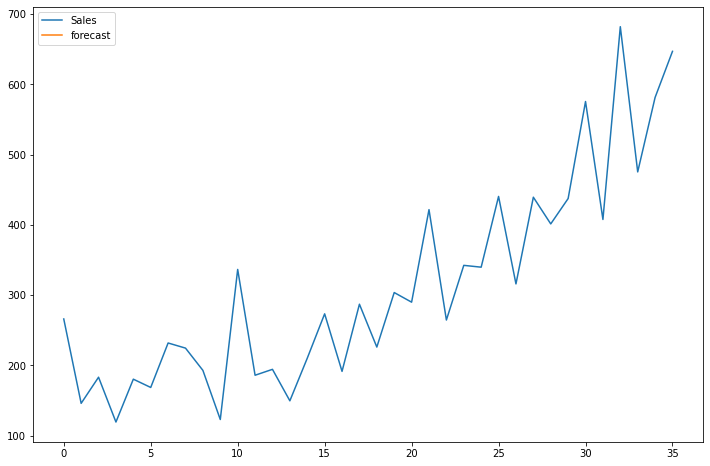

In [11]:
import statsmodels.api as sm
model=sm.tsa.statespace.SARIMAX(df_1['Sales'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()
df_1['forecast']=results.predict(start=90,end=103,dynamic=True)
df_1[['Sales','forecast']].plot(figsize=(12,8))

In [12]:
from pandas.tseries.offsets import DateOffset
pred_date=[df_1.index[-1] + DateOffset(months=x)for x in range(0,24)]
pred_date=pd.DataFrame(index=pred_date[1:],columns=df_1.columns)
pred_date

TypeError: unsupported operand type(s) for +: 'int' and 'DateOffset'

In [ ]:
df_1=pd.concat([df_1,pred_date])
df_1['forecast'] = results.predict(start = 104, end = 120, dynamic= True)  
df_1[['Sales', 'forecast']].plot(figsize=(12, 8))

#### 3. Winter-Holt

- Fuente de consulta: https://medium.com/analytics-vidhya/python-code-on-holt-winters-forecasting-3843808a9873

In [18]:
# time series - statsmodels 
# Seasonality decomposition
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.seasonal import seasonal_decompose 
# holt winters 
# single exponential smoothing
from statsmodels.tsa.holtwinters import SimpleExpSmoothing   
# double and triple exponential smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing

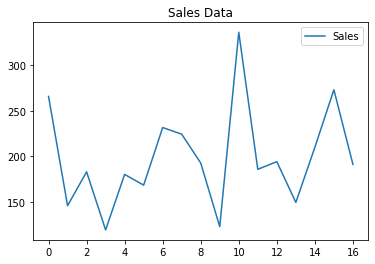

In [19]:
# plotting the original data
# Limite la data para ver bien las grafs
df_1 = df_1[:17]
df_1[['Sales']].plot(title='Sales Data')

In [20]:
decompose_result = seasonal_decompose(df_1, model='multiplicative')
decompose_result.plot()

ValueError: could not convert string to float: '1-01'

In [21]:
# Set the frequency of the date time index as Monthly start as indicated by the data
df_1.index.Sales = 'MS'
# Set the value of Alpha and define m (Time Period)
m = 12
alpha = 1/(2 * m)

In [22]:
df_1['HWES1'] = SimpleExpSmoothing(df_1).fit(smoothing_level=alpha, optimized=False, use_brute=True).fittedvalues
df_1[['Sales','HWES1']].plot(title='Holt Winters Single Exponential Smoothing')

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [ ]:
df_1['HWES2_ADD'] = ExponentialSmoothing(df_1['Sales'],trend='add').fit().fittedvalues
df_1['HWES2_MUL'] = ExponentialSmoothing(df_1['Sales'],trend='mul').fit().fittedvalues
df_1[['Sales','HWES2_ADD','HWES2_MUL']].plot(title='Holt Winters Double Exponential Smoothing: Additive and Multiplicative Trend')

In [ ]:
df_1['HWES3_ADD'] = ExponentialSmoothing(df_1['Sales'],trend='add', seasonal='add',seasonal_periods=12).fit().fittedvalues
df_1['HWES3_MUL'] = ExponentialSmoothing(df_1['Sales'],trend='mul', seasonal='mul',seasonal_periods=12).fit().fittedvalues
df_1[['Sales','HWES3_ADD','HWES3_MUL']].plot(title='Holt Winters Triple Exponential Smoothing: Additive and Multiplicative Seasonality');

In [ ]:
#train_test_split
buf = df_1.copy()
#train_test_split
tra = buf[:53].dropna()
tes = buf[54:].dropna()

In [ ]:
fitted_model = ExponentialSmoothing(tra['Sales'],trend='mul',seasonal='mul',seasonal_periods=12).fit()
test_predictions = fitted_model.forecast(24)
tra['Sales'].plot(legend=True, label='TRAIN')
tes['Sales'].plot(legend=True, label='TEST', figsize=(15,7))
test_predictions.plot(legend=True,label='PREDICTION')
plt.title('Train, Test and Predicted Test using Holt Winters')

In [ ]:
tes['Sales'].plot(legend=True,label='TEST',figsize=(15,7))
test_predictions.plot(legend=True, label='PREDICTION', xlim=['1959-07-01','1959-07-24']);

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
print(tes.shape, test_predictions.shape)
print(f'Mean Absolute Error = {mean_absolute_error(tes[:24],test_predictions)}')
print(f'Mean Squared Error = {mean_squared_error(tes[:24],test_predictions)}')

#### 4. Red Neuronal
- Fuente de consulta: https://machinelearningmastery.com/time-series-prediction-lstm-recurrent-neural-networks-python-keras/

In [23]:
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)

# fix random seed for reproducibility
numpy.random.seed(7)
# load the dataset
# df_1 = pd.read_csv("daily-total-female-births.csv")
dataframe = read_csv('shampoo.csv', usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# reshape into X=t and Y=t+1
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = numpy.reshape(testX, (testX.shape[0], testX.shape[1], 1))
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(look_back, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

Epoch 1/100
20/20 - 1s - loss: 0.0791
Epoch 2/100
20/20 - 0s - loss: 0.0610
Epoch 3/100
20/20 - 0s - loss: 0.0465
Epoch 4/100
20/20 - 0s - loss: 0.0376
Epoch 5/100
20/20 - 0s - loss: 0.0305
Epoch 6/100
20/20 - 0s - loss: 0.0259
Epoch 7/100
20/20 - 0s - loss: 0.0234
Epoch 8/100
20/20 - 0s - loss: 0.0214
Epoch 9/100
20/20 - 0s - loss: 0.0203
Epoch 10/100
20/20 - 0s - loss: 0.0198
Epoch 11/100
20/20 - 0s - loss: 0.0197
Epoch 12/100
20/20 - 0s - loss: 0.0195
Epoch 13/100
20/20 - 0s - loss: 0.0192
Epoch 14/100
20/20 - 0s - loss: 0.0191
Epoch 15/100
20/20 - 0s - loss: 0.0191
Epoch 16/100
20/20 - 0s - loss: 0.0190
Epoch 17/100
20/20 - 0s - loss: 0.0188
Epoch 18/100
20/20 - 0s - loss: 0.0187
Epoch 19/100
20/20 - 0s - loss: 0.0187
Epoch 20/100
20/20 - 0s - loss: 0.0186
Epoch 21/100
20/20 - 0s - loss: 0.0187
Epoch 22/100
20/20 - 0s - loss: 0.0184
Epoch 23/100
20/20 - 0s - loss: 0.0184
Epoch 24/100
20/20 - 0s - loss: 0.0184
Epoch 25/100
20/20 - 0s - loss: 0.0183
Epoch 26/100
20/20 - 0s - loss: 0.

In [24]:
# calculate Train Root Mean Squared Error (RMSE) 
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 70.40 RMSE
Test Score: 245.05 RMSE


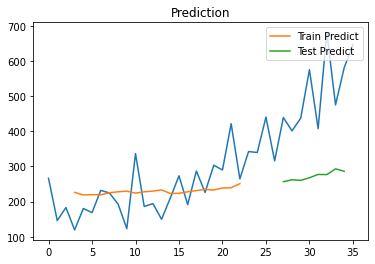

In [25]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot, label='Train Predict')
plt.plot(testPredictPlot, label='Test Predict')
plt.title('Prediction')
plt.legend(loc='upper right')
plt.show()

#### 5. FB Prophet

In [ ]:
from prophet import Prophet

In [ ]:
#Requiere de una pequeña transformación de los datos a usar
series = pd.read_csv("Shampoo.csv", header = 0, index_col = None)
series["ds"] = pd.to_datetime(series["Month"])
series["y"] = series[["Sales"]].astype(float)
series = series[["ds", "y"]]
series.head( )

#Ejecución
modelo = Prophet(mcmc_samples = 500, seasonality_mode = "multiplicative")
modelo_ajustado = modelo.fit(series)
futuro = modelo_ajustado.make_future_dataframe(periods = 48, freq = "M")
prediccion = modelo_ajustado.predict(futuro)
prediccion[["ds", "yhat", "yhat_lower", "yhat_upper"]].tail( )

In [ ]:
df_1["ds"] = df_1.Month
df_1["y"] = df_1.Sales

data = df_1[["ds","y"]]

m = Prophet()
m.fit(df_1)

future = m.make_future_dataframe(periods=365)

forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

fig1 = m.plot(forecast)